# Review

Describe every single part of the following snippet:

In [ ]:
def my_function(a, c='blah', b=1234):
    print("a: {}".format(a))
    print("b: {}".format(b))
    print("c: {}".format(c))    
    x, y = a
    return x*3 + y

print("one")
my_function( (1,1) )

print("two")
my_function((1,1), 2)

print("three")
my_function( (1,1), b=2)

print("next")
foo = my_function
x = foo([123, 456])
print('x is {}'.format(x))

You should be able to answer the following questions:

* What is the value of the name `x` at all points in execution?
* What does the assignment `x, y = a` assume about `a`?
* What does the expression `x*3 + y` about `x` and `y`?
* Do we specify a value of `b` in our function call line `x = foo([123, 456])`? If yes or no, why or why not? What value will `b` have?


Reminder: if this is mysterious to you, play with it in the website http://pythontutor.com .

# Numpy introduction

# numpy basics and creating arrays

Numpy is a widely used library for handling arrays of data, especially numerical data. It would not be an exageration to say it is fundamental to the Python data science ecosystem.

The most important part of numpy is the numpy `array` type. A numpy `array` is conceptually similar to a Python `list` or `tuple` but each element has the same data type and the array has a fixed size.

Typically `numpy` is imported as `np`, a conventional shorthand that saves a bit of typing.

In [ ]:
import numpy as np

We can create an array from any sequence type, such as lists and tuples:

In [ ]:
x = np.array([1,2,3,4])
x

We can crate an array of `n` elements (from `0` to `n-1`) with the `arange` function.

In [ ]:
x = np.arange(10)
x

We can create an array of `n` equally spaced elements from `start` to `stop` with `np.linspace`. For example, here `start` is `100`, `stop` is `120` and `n` is 11.

In [ ]:
np.linspace(100, 120, 11)

We can also create arrays of zero or one with a given shape:

In [ ]:
np.zeros((3,5))

In [ ]:
np.ones((5,3))

## array shape

In addition to 1 dimensional numpy arrays which are very similar to lists or tuples, numpy arrays may also be 2 or more dimensions. The `shape` attribute of a numpy array may be used to get or set its number of dimensions and size.

In [ ]:
x = np.arange(12)
x.shape = (3,4)
x

In [ ]:
x.shape

The `ndim` attribute is the dimensionality of the array (and, thus, equal to length of the array `shape`):

In [ ]:
x.ndim

## array operations

Numpy arrays support mathematical operations with other numpy arrays and with single numbers ("scalars").

With scalars, the scalar is first converted to an array with the same shape as the numpy array and then an element-wise operation is performed.

With other arrays of the same size, an element-wise operation is performed.

In [ ]:
x = np.arange(10)
x

In [ ]:
y = np.arange(10) * 2
y

In [ ]:
z = x + y
z

In [ ]:
x + 3

In [ ]:
x + 3.5

In [ ]:
x/5

In [ ]:
4 + x

## array dtype

Just like lists or tuples, every element in a numpy array has a data type. As mentioned above, however, every element in a numpy array has the same data type, and thus we can refer to the "datatype of the array". This can be set when the array is created with the `dtype` keyword argument and read from the `dtype` attribute:

In [ ]:
x = np.arange(10)
x

In [ ]:
x.dtype

In [ ]:
x = np.arange(10, dtype=np.float)
x

In [ ]:
x.dtype

## array indexing and slicing

Numpy arrays can be indexed sliced just like other Python sequence types such as lists, tuples, and strings.

Just like with python lists, the indexes or slices can be read and written. In other words, numpy arrays are *mutable*.

In [ ]:
x = np.arange(10)
x

In [ ]:
x[:4]

In [ ]:
x[4:]

In [ ]:
x[4:7]

There is a new part of the slice syntax: the step size. By default, this is 1. However, to skip data, the step size can be larger that 1. It can also be negative to go backwards.

In [ ]:
x[::2]

In [ ]:
x[::-1]

Because numpy arrays can have 2 or more, dimensions, we can also index and slice them in higher dimensions. For two dimensional arrays, the first index is always the row index and the second index is always the column index.

In [ ]:
x = np.arange(12)
x.shape = (3,4)
x

In [ ]:
x[1:, :]

In [ ]:
x[:, 1:]

In [ ]:
x[1:, 2:]

In [ ]:
x[1:, 2:] = 99
x

## References to arrays

Remember that variable assignment in Python does not create a new object but only creates a variable which points to an existing object. This is very important with numpy.

In [ ]:
x = np.arange(20)
x

In [ ]:
# Here we create a variable which references the first 10 elements of `x`.
y = x[:10]
y

In [ ]:
# Now we assign all the elements of `y` to have the value of 123.
# We do this by creating a slice into the array `y` and assigning to it.
y[:] = 123

In [ ]:
# How does this affect the original array `x`?
x

In [ ]:
# Now we assign all the elements of `y` to have the value of 123.
y[-1] = 999

In [ ]:
x

In [ ]:
# Now we assign all the elements of `y` to have the value of 123.
y[::2] = -1

In [ ]:
x

In [ ]:
x[:3] = -100

In [ ]:
y

In [ ]:
z = y.copy()

In [ ]:
y

In [ ]:
z

In [ ]:
y[:2] = -9999

In [ ]:
y

In [ ]:
z

In [ ]:
z = y[:]

In [ ]:
y

In [ ]:
z

In [ ]:
y[:2] = 444444

In [ ]:
y

In [ ]:
z

# Some key differences between a numpy array and a Python list

With a numpy array, a slice is created by `[:]` (e.g. `my_array[:]`). With a plain Python list, `[:]` will return a copy of the list.

For both numpy arrays and Python lists, the `.copy()` method will make a copy, so this is preferred if you want to be sure you are making a copy.

In [ ]:
a = [1,2,3]

In [ ]:
b = a[:]

In [ ]:
a[0] = 100

In [ ]:
b

In [ ]:
a

## Efficient data processing with numpy

Because operations on numpy arrays happen for all elements with a single Python expression, these can operations can be performed very fast and efficiently by the computer. For example, if `x` is a numpy array with 10,000 elements, we can avoid a Python for loop with 10,000 iterations by performing our work with numpy.

Below we use the Jupyter "magic command `%timeit`" to measure how long a single expression takes, in this case performing an element-wise multiplication.

In [85]:
x = np.arange(10000, dtype=np.float)

In [86]:
%timeit x*x

9.03 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [87]:
y = x*x
len(y)

10000

In [88]:
assert y[2] == 4

Now let's do the same as above with a Python `list`. We need to crease a list_mul function.

In [89]:
def list_mul(a,b):
    """element-wise product of `a` and `b`"""
    n = len(a)
    assert(n==len(b))
    c = []
    for i in range(n):
        c.append(a[i] * b[i])
    return c

Now convert `x` to a list from a numpy array.

In [90]:
x = list(x)

In [91]:
%timeit list_mul(x,x)

4.38 ms ± 97.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
y = list_mul(x,x)

In [93]:
assert y[2] == 4

## Elementwise numpy operations

Above you have already seen element-wise multiplication, which multiplies every element of two inputs. Similarly, other operations operate element wise on a single input array.

In [94]:
np.sqrt( np.array([1, 4, 9]))

array([1., 2., 3.])

In [95]:
np.linspace( 0, 2*np.pi, 30) 

array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])

In [96]:
np.cos( np.linspace( 0, 2*np.pi, 30) )

array([ 1.        ,  0.97662056,  0.90757542,  0.79609307,  0.64738628,
        0.46840844,  0.26752834,  0.05413891, -0.161782  , -0.37013816,
       -0.56118707, -0.72599549, -0.85685718, -0.94765317, -0.99413796,
       -0.99413796, -0.94765317, -0.85685718, -0.72599549, -0.56118707,
       -0.37013816, -0.161782  ,  0.05413891,  0.26752834,  0.46840844,
        0.64738628,  0.79609307,  0.90757542,  0.97662056,  1.        ])

## More numpy operations

In addition to elementwise operations such as `np.cos(x)` or `x * y` where `x` and `y` are same-shaped arrays, numpy can also perform operations on entire arrays.

Take for example the `mean()` function.

In [97]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
np.mean(x)

4.5

We can also do the mean on a 2D array, either for the entire array or row-wise or column-wise:

In [99]:
x = np.arange(30)
x.shape = (5,6)
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [100]:
np.mean(x)

14.5

In [101]:
# take the mean across the rows, which is axis 0.
np.mean(x,axis=0)

array([12., 13., 14., 15., 16., 17.])

In [102]:
# take the mean across the columns, which is axis 1.
np.mean(x,axis=1)

array([ 2.5,  8.5, 14.5, 20.5, 26.5])

In addition to `mean()`, numpy provides `std()`, `sum()`, and more. 

In [103]:
np.std(x)

8.65544144839919

In [104]:
np.sum(x)

435

In [105]:
np.mean(x)

14.5

In [106]:
x.mean()

14.5

## argmin and argmax

Important in many scientific computing applications are `argmin` and `argmax` functions. These return the index of the smallest or largest value, respectively.

In [107]:
x = np.array([0, 10, 0, 4, 3, 2, 100, 2, 2, -1])

In [108]:
min_idx = np.argmin(x)
min_idx

9

In [109]:
x[min_idx]

-1

In [110]:
np.min(x)

-1

In [111]:
max_idx = np.argmax(x)
max_idx

6

In [112]:
x[max_idx]

100

## Because of its speed, numpy makes it possible to use Python for scientific computing.

You can read more about numpy at its [User Guide](https://numpy.org/doc/1.17/user/index.html) and its [Reference Guide](https://numpy.org/doc/1.17/reference/index.html).

Live coding example: calculate distance between 2D points.

In [113]:
import matplotlib.pyplot as plt

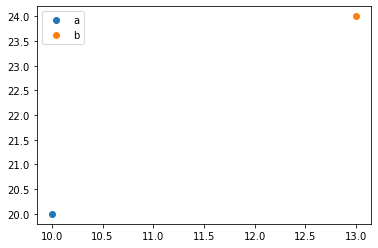

In [121]:
a = (10, 20)
b = (13, 24)

plt.plot([a[0]], [a[1]], 'o', label='a')
plt.plot([b[0]], [b[1]], 'o', label='b')
plt.legend();

In [122]:
dx = b[0] - a[0]
dy = b[1] - a[1]
print(dx,dy)

3 4


In [123]:
np.sqrt(dx**2 + dy**2)

5.0

In [124]:
def my_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    d = b-a
    hypot = np.sqrt(np.sum(d**2))
    return hypot

In [125]:
a = (10, 20)
b = (13, 24)
my_distance(a,b)

5.0